# <font color='pink'>Loan Status Prediction Model</font>
## <font color='pink'>By Parvathi Rajesh</font>

#### parvathi_b191093ch@nitc.ac.in                      (parvathirajesh2001@gmail.com)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

- __<font color='blue'>Importing all the necessary libraries which might be required for the project.</font>__

In [2]:
data = pd.read_csv(r"C:\Users\HP\Desktop\My works\DATA SCIENCE\Loan Pred Dataset for Project\credit_train.csv")

In [3]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [6]:
data.shape

(100514, 19)

- __<font color='blue'>As we can clearly see it is a really huge dataset with 19 columns. All the columns are necessary, but for our purpose we can cut short the data by eliminating few columns that I personally feel will not make much difference to the prediction. Also from data info we see there are lots of null values which also needs to be sorted.</font>__

In [7]:
df=data.filter(['Loan Status','Current Loan Amount','Term','Credit Score','Annual Income','Monthly Debt','Bankruptcies','Tax Liens'])

- __<font color='blue'>Just starting to explore the data and clean the data along with it.</font>__

In [8]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,5214.74,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,33295.98,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,29200.53,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,8741.90,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,20639.70,0.0,0.0


In [9]:
pd.crosstab(df['Credit Score'],df['Loan Status'],margins=True)

Loan Status,Charged Off,Fully Paid,All
Credit Score,,,
585.0,5,7,12
586.0,4,3,7
587.0,4,7,11
588.0,5,15,20
589.0,4,2,6
...,...,...,...
7480.0,43,0,43
7490.0,23,0,23
7500.0,24,0,24


- __<font color='blue'>From my research, I found that Credit score values lie between 300 to 850. So we need to eliminate the error values. Later we can replace null and 0 values with the mean value.</font>__

In [10]:
df['Credit Score'].values[df['Credit Score'].values>850]=0
df['Credit Score'].replace(0, np.nan)

0         709.0
1           NaN
2         741.0
3         721.0
4           NaN
          ...  
100509      NaN
100510      NaN
100511      NaN
100512      NaN
100513      NaN
Name: Credit Score, Length: 100514, dtype: float64

In [11]:
pd.crosstab(df['Credit Score'],df['Loan Status'],margins=True)

Loan Status,Charged Off,Fully Paid,All
Credit Score,,,
0.0,4551,0,4551
585.0,5,7,12
586.0,4,3,7
587.0,4,7,11
588.0,5,15,20
...,...,...,...
748.0,123,1475,1598
749.0,57,770,827
750.0,53,1181,1234


- __<font color='blue'>We have successfully replaced all the values of Credit score above 850 with 0</font>__

- __<font color='blue'>From the crosstab we see that higher the credit score, greater are the chances of getting approved for a loan.</font>__

In [12]:
pd.crosstab(df['Term'],df['Loan Status'],margins=True)

Loan Status,Charged Off,Fully Paid,All
Term,,,
Long Term,8366,19426,27792
Short Term,14273,57935,72208
All,22639,77361,100000


- __<font color='blue'>Most people have opted for short term loans.</font>__

In [13]:
pd.crosstab(df['Bankruptcies'],df['Loan Status'],margins=True)

Loan Status,Charged Off,Fully Paid,All
Bankruptcies,,,
0.0,20183,68591,88774
1.0,2287,8188,10475
2.0,92,325,417
3.0,18,75,93
4.0,7,20,27
5.0,2,5,7
6.0,0,2,2
7.0,0,1,1
All,22589,77207,99796


- __<font color='blue'>We can see that and is obvious that lower the bankruptcies, higher are the chances of loan approval. Bank doesn't want to take risks and therefore having a low bankruptcy value will help the person getting approved for a loan.</font>__

In [14]:
pd.crosstab(df['Tax Liens'],df['Loan Status'],margins=True)

Loan Status,Charged Off,Fully Paid,All
Tax Liens,,,
0.0,22150,75912,98062
1.0,330,1013,1343
2.0,90,284,374
3.0,36,75,111
4.0,21,37,58
5.0,6,10,16
6.0,2,10,12
7.0,3,4,7
9.0,1,2,3


- __<font color='blue'>A tax lien is a lien imposed by law upon a property to secure the payment of taxes. A tax lien may be imposed for delinquent taxes owed on real property or personal property, or as a result of failure to pay income taxes or other taxes.</font>__

- __<font color='blue'>From the table, we see that lower the tax lien value higher are the chances of loan approval.</font>__

In [15]:
df['Current Loan Amount']

0           445412.0
1           262328.0
2         99999999.0
3           347666.0
4           176220.0
             ...    
100509           NaN
100510           NaN
100511           NaN
100512           NaN
100513           NaN
Name: Current Loan Amount, Length: 100514, dtype: float64

- __<font color='blue'>While going through the dataset, I found repeated use of '99999999.0' value in the 'Current Loan Amount' column. So we need to replace those values with null value and later we can replace it with the mean column value.</font>__

In [16]:
df['Current Loan Amount']=df['Current Loan Amount'].replace(99999999.0, np.nan)

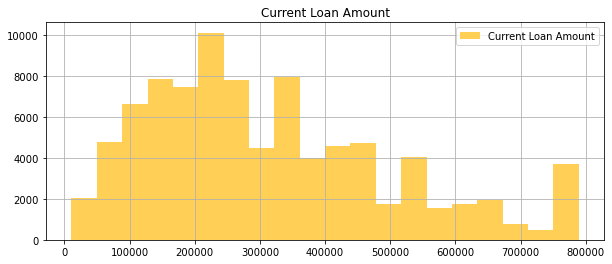

In [17]:
df.hist(column='Current Loan Amount',
        grid=True,
        figsize=(10, 4),
        legend=True,
        bins=20,
        orientation='vertical',
        color='#FFCF56');

- __<font color='blue'>The plot looks standard and almost stable. We can see from the plot that most people have applied for a loan amount in between 200k to 250k.</font>__

In [18]:
df.isnull().sum()

Loan Status              514
Current Loan Amount    11998
Term                     514
Credit Score           19668
Annual Income          19668
Monthly Debt             514
Bankruptcies             718
Tax Liens                524
dtype: int64

- __<font color='blue'>We have to sort all the null values in the dataset with mean and mode values according to the type of data.</font>__

- __<font color='blue'>Since 'Loan Status', 'Term', 'Bankruptcies' and 'Tax Liens' values are categorical, we replace such null values with mode values.</font>__

In [19]:
df['Loan Status'].fillna(df['Loan Status'].mode()[0],inplace=True)
df['Current Loan Amount'].fillna(df['Current Loan Amount'].mean(),inplace=True)
df['Term'].fillna(df['Term'].mode()[0],inplace=True)
df['Credit Score'].fillna(df['Credit Score'].mean(),inplace=True)
df['Annual Income'].fillna(df['Annual Income'].mean(),inplace=True)
df['Monthly Debt'].fillna(df['Monthly Debt'].mean(),inplace=True)
df['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0],inplace=True)
df['Tax Liens'].fillna(df['Tax Liens'].mode()[0],inplace=True)

In [20]:
df.isnull().sum()

Loan Status            0
Current Loan Amount    0
Term                   0
Credit Score           0
Annual Income          0
Monthly Debt           0
Bankruptcies           0
Tax Liens              0
dtype: int64

- __<font color='blue'>We cleared all the null values. :></font>__

In [21]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Bankruptcies,Tax Liens
0,Fully Paid,445412.000000,Short Term,709.000000,1.167493e+06,5214.74,1.0,0.0
1,Fully Paid,262328.000000,Short Term,676.275375,1.378277e+06,33295.98,0.0,0.0
2,Fully Paid,312313.597881,Short Term,741.000000,2.231892e+06,29200.53,0.0,0.0
3,Fully Paid,347666.000000,Long Term,721.000000,8.069490e+05,8741.90,0.0,0.0
4,Fully Paid,176220.000000,Short Term,676.275375,1.378277e+06,20639.70,0.0,0.0


- __<font color='blue'>Now since we have cleaned and explored our dataset, we are good to do the maths part and applying different algorithms and finding the perfect algorithm for our project based on accuracy.</font>__

In [22]:
x=df.iloc[:,np.r_[1:8]].values
y=df.iloc[:,0].values

In [23]:
x

array([[445412.0, 'Short Term', 709.0, ..., 5214.74, 1.0, 0.0],
       [262328.0, 'Short Term', 676.2753754050912, ..., 33295.98, 0.0,
        0.0],
       [312313.59788060916, 'Short Term', 741.0, ..., 29200.53, 0.0, 0.0],
       ...,
       [312313.59788060916, 'Short Term', 676.2753754050912, ...,
        18472.412335799687, 0.0, 0.0],
       [312313.59788060916, 'Short Term', 676.2753754050912, ...,
        18472.412335799687, 0.0, 0.0],
       [312313.59788060916, 'Short Term', 676.2753754050912, ...,
        18472.412335799687, 0.0, 0.0]], dtype=object)

In [24]:
y

array(['Fully Paid', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

In [25]:
x=df.iloc[:,np.r_[1:8]].values
y=df.iloc[:,0].values

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
x_train

array([[131736.0, 'Short Term', 713.0, ..., 8798.9, 0.0, 0.0],
       [182710.0, 'Short Term', 705.0, ..., 21697.05, 1.0, 0.0],
       [153626.0, 'Short Term', 676.2753754050912, ..., 20342.35, 0.0,
        0.0],
       ...,
       [127930.0, 'Short Term', 718.0, ..., 10425.87, 0.0, 0.0],
       [130856.0, 'Short Term', 719.0, ..., 11347.94, 0.0, 0.0],
       [138490.0, 'Short Term', 721.0, ..., 4448.28, 0.0, 0.0]],
      dtype=object)

In [28]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder_X=LabelEncoder()

- __<font color='blue'>Label Encoder will assign numerical values for non-numerical ones. This is done because machine and most algorithms understand/prefer numericl values.</font>__

In [29]:
x_train[:,1]=Label_Encoder_X.fit_transform(x_train[:,1])

In [30]:
x_train

array([[131736.0, 1, 713.0, ..., 8798.9, 0.0, 0.0],
       [182710.0, 1, 705.0, ..., 21697.05, 1.0, 0.0],
       [153626.0, 1, 676.2753754050912, ..., 20342.35, 0.0, 0.0],
       ...,
       [127930.0, 1, 718.0, ..., 10425.87, 0.0, 0.0],
       [130856.0, 1, 719.0, ..., 11347.94, 0.0, 0.0],
       [138490.0, 1, 721.0, ..., 4448.28, 0.0, 0.0]], dtype=object)

- __<font color='blue'>Here, for the 'Term' column, '1' implies 'Short Term' and '0' implies 'Long Term' loans.</font>__

In [31]:
y_train

array(['Fully Paid', 'Charged Off', 'Fully Paid', ..., 'Charged Off',
       'Fully Paid', 'Fully Paid'], dtype=object)

In [32]:
Label_Encoder_Y=LabelEncoder()
y_train=Label_Encoder_Y.fit_transform(y_train)

In [33]:
y_train

array([1, 0, 1, ..., 0, 1, 1])

- __<font color='blue'>Here, '1' implies 'FullyPaid' and '0' implies 'Charged off' loans.</font>__

In [34]:
x_test[:,1]=Label_Encoder_X.fit_transform(x_test[:,1])

In [35]:
y_test=Label_Encoder_Y.fit_transform(y_test)

In [36]:
x_test

array([[123024.0, 1, 724.0, ..., 9414.88, 0.0, 0.0],
       [346346.0, 1, 699.0, ..., 3940.03, 0.0, 0.0],
       [223234.0, 0, 720.0, ..., 15760.88, 0.0, 0.0],
       ...,
       [521554.0, 1, 676.2753754050912, ..., 10078.55, 0.0, 0.0],
       [559174.0, 0, 689.0, ..., 23715.8, 0.0, 0.0],
       [306196.0, 1, 712.0, ..., 21203.05, 0.0, 0.0]], dtype=object)

In [37]:
y_test

array([0, 1, 1, ..., 0, 1, 1])

In [38]:
from sklearn.preprocessing import StandardScaler
S_S=StandardScaler()
x_train-S_S.fit_transform(x_train)
x_test-S_S.fit_transform(x_test)

array([[123025.07922893342, 0.3815304032964587, 723.6830225514444, ...,
        9415.632942325406, 0.3381528235406028, 0.11922475612620129],
       [346345.80136489525, 0.3815304032964587, 698.8519074689239, ...,
        3941.237197049049, 0.3381528235406028, 0.11922475612620129],
       [223234.50582033387, 1.6168943555674564, 719.7100441382411, ...,
        15761.10640726486, 0.3381528235406028, 0.11922475612620129],
       ...,
       [521552.79881251615, 0.3815304032964587, 676.2807967279936, ...,
        10079.247876847368, 0.3381528235406028, 0.11922475612620129],
       [559172.583548256, 1.6168943555674564, 688.9194614359157, ...,
        23715.36637822549, 0.3381528235406028, 0.11922475612620129],
       [306196.0311059917, 0.3815304032964587, 711.7640873118346, ...,
        21202.824864039136, 0.3381528235406028, 0.11922475612620129]],
      dtype=object)

In [39]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
Predict_Y=DTC.predict(x_test)
Predict_Y

array([1, 1, 1, ..., 1, 1, 1])

In [41]:
from sklearn import metrics
print('Acuracy of Decision Tree Prediction: ',metrics.accuracy_score(Predict_Y,y_test))

Acuracy of Decision Tree Prediction:  0.7576978560413868


- __<font color='blue'>Applying Decision Tree algorithm, we got an accuracy of about 76% which is not so good. So let's try applying an alternative algorithm i.e. Naive Bayes alogorithm.</font>__

In [42]:
from sklearn.naive_bayes import GaussianNB
NBC=GaussianNB()
NBC.fit(x_train,y_train)

GaussianNB()

In [43]:
Predict_Y=NBC.predict(x_test)
Predict_Y

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
print('Acuracy of Naive Bayes Prediction: ',metrics.accuracy_score(Predict_Y,y_test))

Acuracy of Naive Bayes Prediction:  0.8120181067502363


- __<font color='blue'>As it is clearly visible that Naive Bayes has a higher accuracy rate than Decision tree, we will use Naive Bayes algorithm for our project.</font>__

In [45]:
test_data=pd.read_csv(r"C:\Users\HP\Desktop\My works\DATA SCIENCE\Loan Pred Dataset for Project\credit_test.csv")

In [46]:
test_data.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  float64
 13  N

In [48]:
test_data.shape

(10353, 18)

In [49]:
df_test=test_data.filter(['Current Loan Amount','Term','Credit Score','Annual Income','Monthly Debt','Bankruptcies','Tax Liens'])

In [50]:
df_test.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Bankruptcies,Tax Liens
0,611314.0,Short Term,747.0,2074116.0,42000.83,0.0,0.0
1,266662.0,Short Term,734.0,1919190.0,36624.40,0.0,0.0
2,153494.0,Short Term,709.0,871112.0,8391.73,0.0,0.0
3,176242.0,Short Term,727.0,780083.0,16771.87,1.0,0.0
4,321992.0,Short Term,744.0,1761148.0,39478.77,0.0,0.0


- __<font color='blue'>Cleaning our test dataset similar to our train dataset</font>__

In [51]:
df_test['Current Loan Amount']

0        611314.0
1        266662.0
2        153494.0
3        176242.0
4        321992.0
           ...   
10348         NaN
10349         NaN
10350         NaN
10351         NaN
10352         NaN
Name: Current Loan Amount, Length: 10353, dtype: float64

In [52]:
df_test['Current Loan Amount']=df_test['Current Loan Amount'].replace(99999999.0, np.nan)

In [53]:
df_test['Current Loan Amount']

0        611314.0
1        266662.0
2        153494.0
3        176242.0
4        321992.0
           ...   
10348         NaN
10349         NaN
10350         NaN
10351         NaN
10352         NaN
Name: Current Loan Amount, Length: 10353, dtype: float64

<AxesSubplot:>

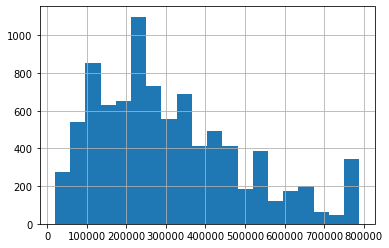

In [54]:
df_test['Current Loan Amount'].hist(bins=20)

In [55]:
df_test['Credit Score']

0        747.0
1        734.0
2        709.0
3        727.0
4        744.0
         ...  
10348      NaN
10349      NaN
10350      NaN
10351      NaN
10352      NaN
Name: Credit Score, Length: 10353, dtype: float64

In [56]:
pd.crosstab(df_test['Credit Score'],df['Term'],margins=True)

Term,Long Term,Short Term,All
Credit Score,,,
585.0,0,1,1
586.0,0,1,1
587.0,1,0,1
588.0,1,0,1
594.0,0,1,1
...,...,...,...
7480.0,1,4,5
7490.0,1,0,1
7500.0,0,3,3


In [57]:
df_test['Credit Score'].values[df_test['Credit Score'].values>850]=0
df_test['Credit Score'].replace(0, np.nan)

0        747.0
1        734.0
2        709.0
3        727.0
4        744.0
         ...  
10348      NaN
10349      NaN
10350      NaN
10351      NaN
10352      NaN
Name: Credit Score, Length: 10353, dtype: float64

In [58]:
df_test.isnull().sum()

Current Loan Amount    1486
Term                    353
Credit Score           2334
Annual Income          2334
Monthly Debt            353
Bankruptcies            375
Tax Liens               354
dtype: int64

In [59]:
df_test['Current Loan Amount'].fillna(df_test['Current Loan Amount'].mean(),inplace=True)
df_test['Term'].fillna(df_test['Term'].mode()[0],inplace=True)
df_test['Credit Score'].fillna(df_test['Credit Score'].mean(),inplace=True)
df_test['Annual Income'].fillna(df_test['Annual Income'].mean(),inplace=True)
df_test['Monthly Debt'].fillna(df_test['Monthly Debt'].mean(),inplace=True)
df_test['Bankruptcies'].fillna(df_test['Bankruptcies'].mode()[0],inplace=True)
df_test['Tax Liens'].fillna(df_test['Tax Liens'].mode()[0],inplace=True)

In [60]:
df_test.isnull().sum()

Current Loan Amount    0
Term                   0
Credit Score           0
Annual Income          0
Monthly Debt           0
Bankruptcies           0
Tax Liens              0
dtype: int64

- __<font color='blue'>We successfully cleaned our test data also and now we are good to apply our model to the data and predict values.</font>__

In [61]:
df_test.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Bankruptcies,Tax Liens
0,611314.0,Short Term,747.0,2074116.0,42000.83,0.0,0.0
1,266662.0,Short Term,734.0,1919190.0,36624.40,0.0,0.0
2,153494.0,Short Term,709.0,871112.0,8391.73,0.0,0.0
3,176242.0,Short Term,727.0,780083.0,16771.87,1.0,0.0
4,321992.0,Short Term,744.0,1761148.0,39478.77,0.0,0.0


In [62]:
test=df_test.iloc[:,np.r_[0:7]].values

In [63]:
test[:,1]=Label_Encoder_X.fit_transform(test[:,1])
test

array([[611314.0, 1, 747.0, ..., 42000.83, 0.0, 0.0],
       [266662.0, 1, 734.0, ..., 36624.4, 0.0, 0.0],
       [153494.0, 1, 709.0, ..., 8391.73, 0.0, 0.0],
       ...,
       [308786.8789895117, 1, 676.480109739369, ..., 18429.671698999955,
        0.0, 0.0],
       [308786.8789895117, 1, 676.480109739369, ..., 18429.671698999955,
        0.0, 0.0],
       [308786.8789895117, 1, 676.480109739369, ..., 18429.671698999955,
        0.0, 0.0]], dtype=object)

In [64]:
test-S_S.fit_transform(test)

array([[611312.2216617999, 0.40528390092942335, 746.522358574444, ...,
        41998.89573667871, 0.32577034820188777, 0.10501701782435616],
       [266662.2476217049, 0.40528390092942335, 733.6104094563906, ...,
        36622.90692973404, 0.32577034820188777, 0.10501701782435616],
       [153494.91285454997, 0.40528390092942335, 708.7797380755187, ...,
        8392.553719488102, 0.32577034820188777, 0.10501701782435616],
       ...,
       [308786.8789895117, 0.40528390092942335, 676.480109739369, ...,
        18429.671698999955, 0.32577034820188777, 0.10501701782435616],
       [308786.8789895117, 0.40528390092942335, 676.480109739369, ...,
        18429.671698999955, 0.32577034820188777, 0.10501701782435616],
       [308786.8789895117, 0.40528390092942335, 676.480109739369, ...,
        18429.671698999955, 0.32577034820188777, 0.10501701782435616]],
      dtype=object)

In [65]:
prediction=NBC.predict(test)

In [66]:
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [67]:
np.set_printoptions(threshold=np.inf)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

- __<font color='blue'>From my prediction, my model has predicted the 'Loan Status' of the 'Test Data' where '1' implies the loan is most likely to get 'Fully paid' and '0' implies that the loan amount is likely to be 'Charged Off' and hence it is better not to approve their Loan application.</font>__

- __<font color='blue'>For my project, I have used dataset from Kaggle. The Link for the dataset is given below.</font>__

- __(https://www.kaggle.com/zaurbegiev/my-dataset)__